# July-P2 Batch Oasis Infobyte SIP

# Task 5 - Sales Prediction

# Data and Packages Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score


In [2]:
# Load the dataset
data = pd.read_csv('Advertising.csv')

# Explore the dataset (check for missing values, etc.)
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
cols = data.columns.tolist()
print(cols)

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']


In [4]:
data.drop(cols[0], axis=1, inplace=True)


In [5]:
data.head(1)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


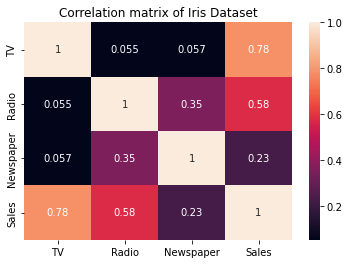

In [6]:
plt.title("Correlation matrix of Iris Dataset")
sns.heatmap(data.corr(), annot=True)
plt.show()

## Data Preprocessing

In [7]:
data.isna().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.duplicated().sum()


0

In [9]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [10]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Data Visualisation

In [12]:
def distPlot(x:str="", y:str="", data:pd.DataFrame()=None):
    plt.title("{1} {0}".format(x, y))
    sns.scatterplot(x=data[x], y=data[y], hue=data[x])
    plt.show()

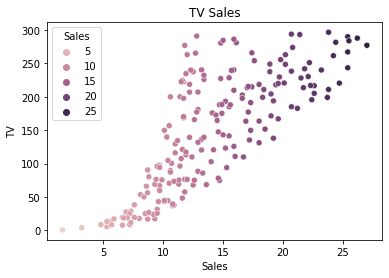

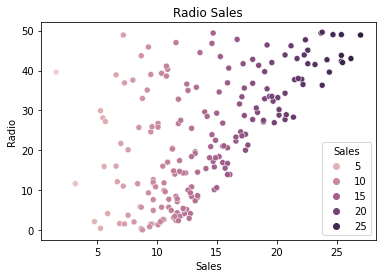

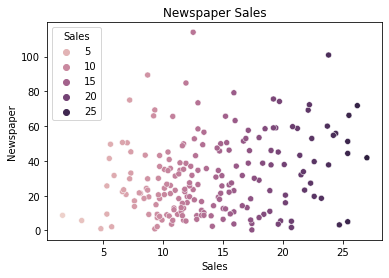

In [13]:
distPlot(x='Sales', y='TV', data=data)
distPlot(x='Sales', y='Radio', data=data)
distPlot(x="Sales", y='Newspaper', data=data)

In [14]:
X = data.drop("Sales", axis=1)
y = data['Sales']

## Model Implementing

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)

## Model Score

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print(f"Accuracy: {r2: .2%}")


Mean Squared Error: 3.174097353976104
Accuracy:  89.94%
